In [1]:
import pandas as pd

In [2]:
algs = ['AntCol', 'BacktrackingDSatur', 'HillClimber', 'HybridEA', 'PartialColAndTabuCol', 'RLF', 'SimpleGreedy']

In [3]:
df = pd.read_csv('../Data/Generator/const_clique_sizes_results/all-algs_chr20_clq1-300_data.csv')
df = df.drop('Unnamed: 0', 'columns')
df = df.sort_values(['alg', 'num_cliques'])

In [4]:
df

,alg,clique_size,num_cliques,chr_num,clrs_fnd,time_taken,checks,num_improved
0,AntCol,15,1,20,15,135,1222765,1
7,AntCol,15,2,20,15,127,1161447,1
14,AntCol,15,3,20,15,115,1103746,1
21,AntCol,15,4,20,15,104,1058384,1
28,AntCol,15,5,20,15,96,1013293,1
...,...,...,...,...,...,...,...,...
2055,SimpleGreedy,15,295,20,39,0,31969,1
2062,SimpleGreedy,15,296,20,39,0,31982,1
2069,SimpleGreedy,15,297,20,39,0,31289,1
2076,SimpleGreedy,15,298,20,39,0,31237,1


In [5]:
import math
df['time^2'] = df.apply(lambda row: (row.time_taken) ** 2, axis=1)

<AxesSubplot:xlabel='num_cliques'>

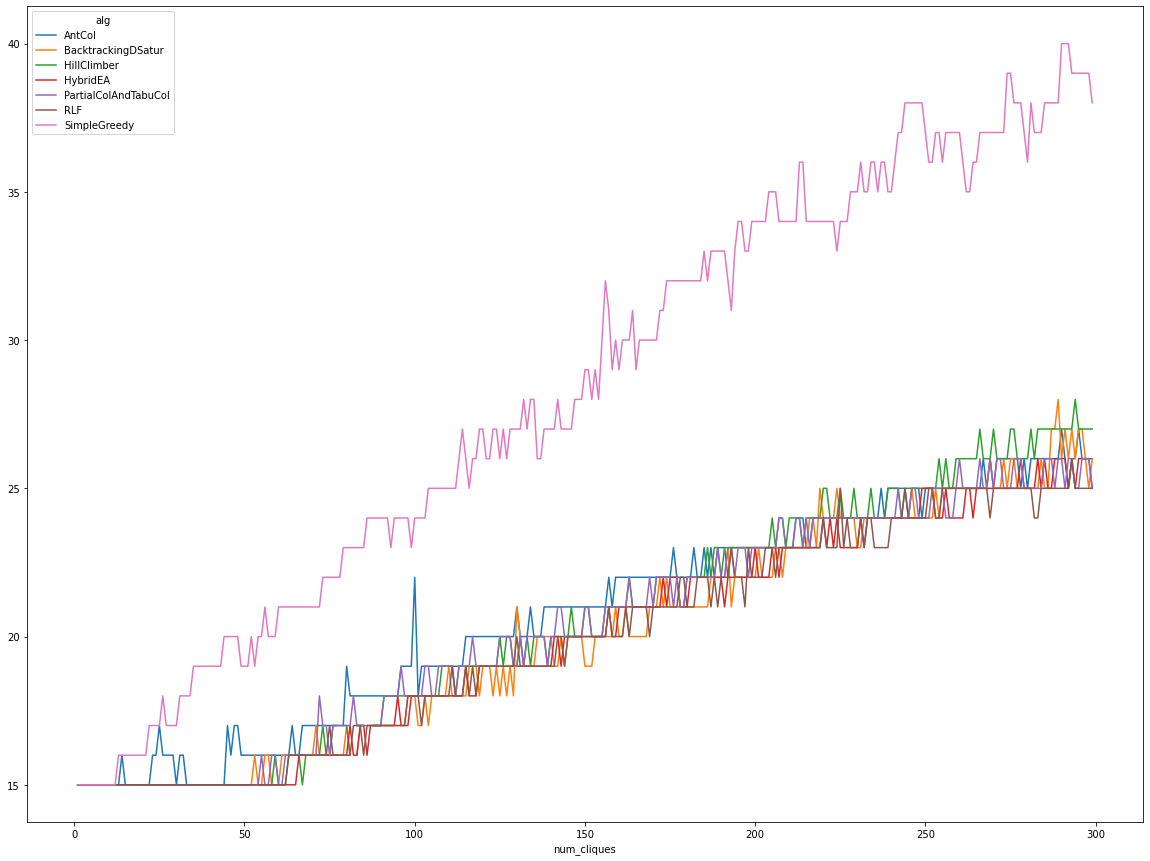

In [6]:
df.pivot(index='num_cliques', columns='alg', values='clrs_fnd').plot(figsize=(20, 15), kind='line')#, subplots=True)

In [7]:
new_df = df.set_index(['alg', 'num_cliques'])
new_df

clique_size  chr_num  clrs_fnd  time_taken   checks  \
alg          num_cliques                                                        
AntCol       1                     15       20        15         135  1222765   
             2                     15       20        15         127  1161447   
             3                     15       20        15         115  1103746   
             4                     15       20        15         104  1058384   
             5                     15       20        15          96  1013293   
...                               ...      ...       ...         ...      ...   
SimpleGreedy 295                   15       20        39           0    31969   
             296                   15       20        39           0    31982   
             297                   15       20        39           0    31289   
             298                   15       20        39           0    31237   
             299                   15       20        38           0    31211   

                          num_improved  time^2  
alg          num_cliques                        
AntCol       1                       1   18225  
             2                       1   16129  
             3                       1   13225  
             4                       1   10816  
             5                       1    9216  
...                                ...     ...  
SimpleGreedy 295                     1       0  
             296                     1       0  
             297                     1       0  
             298                     1       0  
             299                     1       0  

[2084 rows x 7 columns]

In [8]:
new_df['time_taken/clrs_fnd'] = new_df.apply(lambda row: row.time_taken / row.clrs_fnd, axis=1)

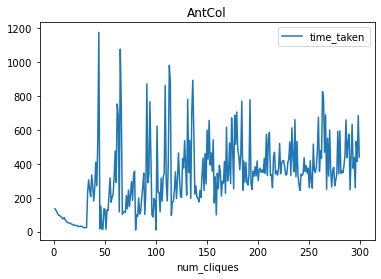

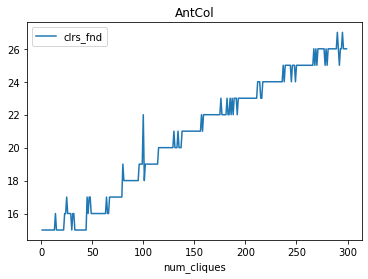

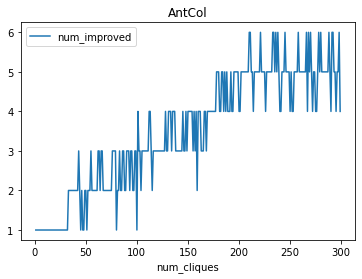

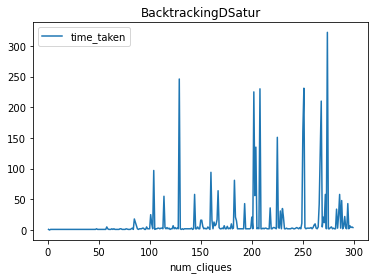

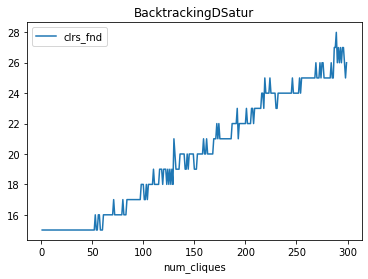

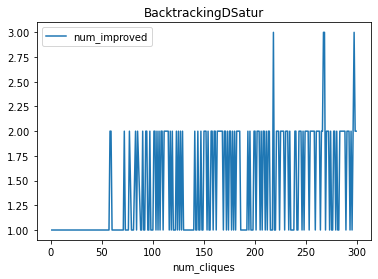

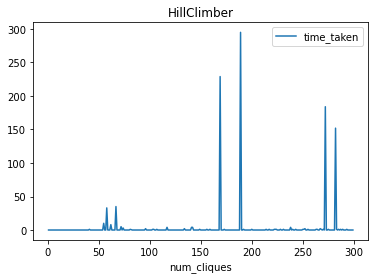

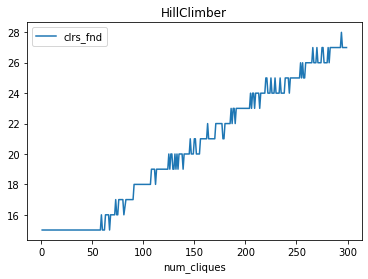

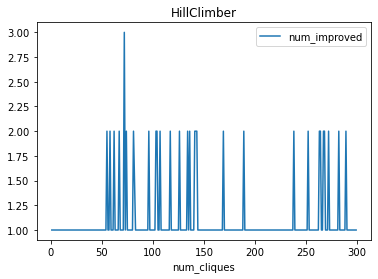

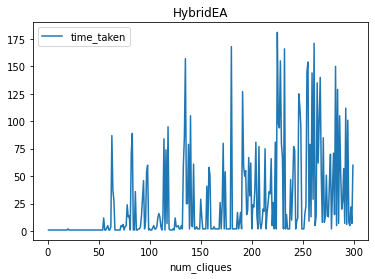

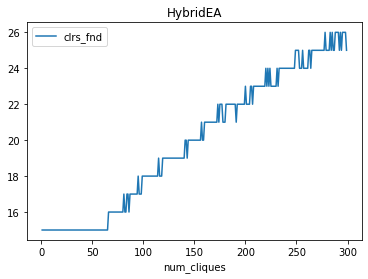

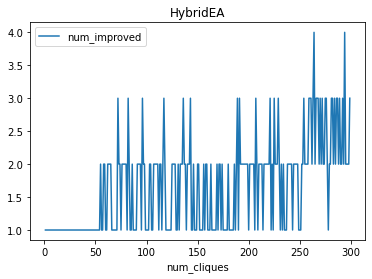

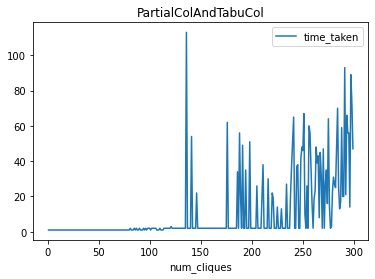

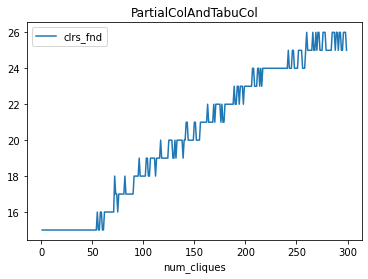

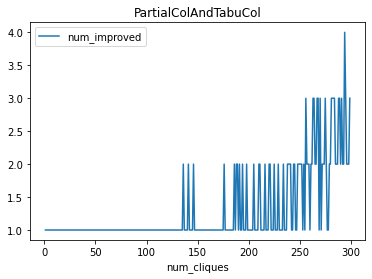

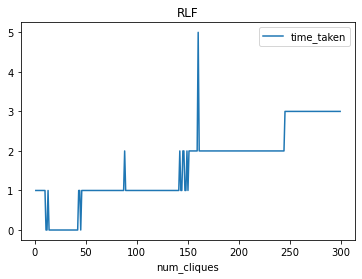

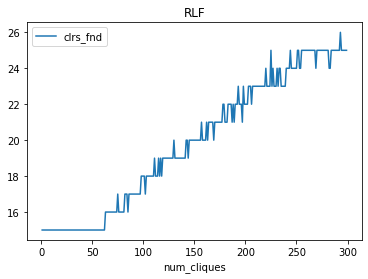

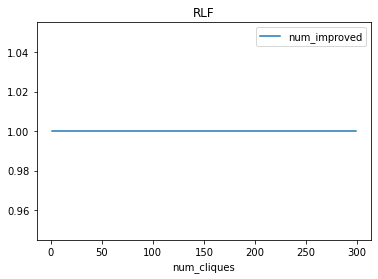

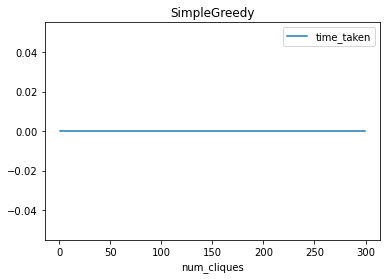

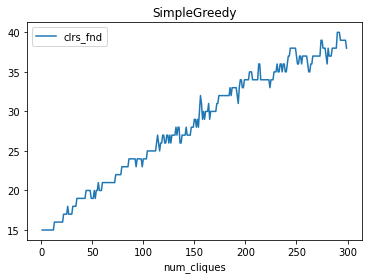

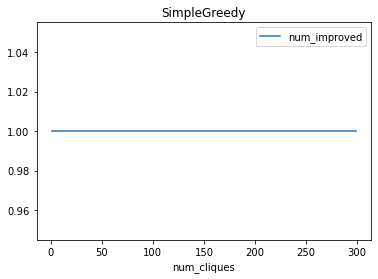

In [9]:
for alg in algs:
    curr = new_df.xs(key=alg, level='alg')
    for i in ['time_taken', 'clrs_fnd', 'num_improved']:
        curr.plot(y=i, title=alg)

In [10]:
new_df

clique_size  chr_num  clrs_fnd  time_taken   checks  \
alg          num_cliques                                                        
AntCol       1                     15       20        15         135  1222765   
             2                     15       20        15         127  1161447   
             3                     15       20        15         115  1103746   
             4                     15       20        15         104  1058384   
             5                     15       20        15          96  1013293   
...                               ...      ...       ...         ...      ...   
SimpleGreedy 295                   15       20        39           0    31969   
             296                   15       20        39           0    31982   
             297                   15       20        39           0    31289   
             298                   15       20        39           0    31237   
             299                   15       20        38           0    31211   

                          num_improved  time^2  time_taken/clrs_fnd  
alg          num_cliques                                             
AntCol       1                       1   18225             9.000000  
             2                       1   16129             8.466667  
             3                       1   13225             7.666667  
             4                       1   10816             6.933333  
             5                       1    9216             6.400000  
...                                ...     ...                  ...  
SimpleGreedy 295                     1       0             0.000000  
             296                     1       0             0.000000  
             297                     1       0             0.000000  
             298                     1       0             0.000000  
             299                     1       0             0.000000  

[2084 rows x 8 columns]

In [11]:
for alg in algs:
    curr = new_df.xs(key=alg, level='alg')
    for i in ['time_taken/clrs_found']:
        curr.plot(y=i, title=alg)

KeyError: 'time_taken/clrs_found'

,alg,clique_size,num_cliques,chr_num,clrs_fnd,time_taken,num_improved
0,AntCol,5,200,20,6,423,2
7,AntCol,5,201,20,6,201,2
14,AntCol,5,202,20,6,211,2
21,AntCol,5,203,20,6,538,2
28,AntCol,5,204,20,6,453,2
...,...,...,...,...,...,...,...
671,SimpleGreedy,5,295,20,11,0,1
678,SimpleGreedy,5,296,20,11,0,1
685,SimpleGreedy,5,297,20,11,0,1
692,SimpleGreedy,5,298,20,11,0,1
